# Task-3 Feature Engineering & Modelling 

### Importing Necessary libraries

In [1]:
import numpy as np
import pandas as pd

# for Data visualization

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# for Date
from datetime import datetime

# for supressing unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

### Importing Data

In [2]:
eda_data = pd.read_csv('clean_eda_data.csv')
eda_data.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

   date_activ    date_end date_modif_prod date_renewal  ...  \
0  2013-06-15  2016-06-15      2015-11-01   2015-06-23  ...   
1  2009-08-21  2016-08-30      2009-08-21   2015-08-31  ...   
2  2010-04-16  2016-04-16      2010-04-16   2015-04-17  ...   
3  2010-03-30  2016-03-30      2010-03-30   2015-03-31  ...   
4  2010-01-13  2016-03-07      2010-01-13   2015-03-09  ...   

   mean_3m_price_off_peak_var  mean_3m_price_peak_var  \
0                    0.131756                0.092638   
1                    0.147600                0.000000   
2                    0.167798                0.088409   
3                    0.148586                0.000000   
4                    0.119906                0.101673   

   mean_3m_price_mid_peak_var  mean_3m_price_off_peak_fix  \
0                    0.036909                   42.497907   
1                    0.000000                   44.444710   
2                    0.000000                   44.444710   
3                    0.000000                   44.444710   
4                    0.073719                   40.728885   

   mean_3m_price_peak_fix  mean_3m_price_mid_peak_fix  mean_3m_price_off_peak  \
0               12.218665                    8.145777               42.629663   
1                0.000000                    0.000000               44.592310   
2                0.000000                    0.000000               44.612508   
3                0.000000                    0.000000               44.593296   
4               24.437330                   16.291555               40.848791   

  mean_3m_price_peak  mean_3m_price_mid_peak  churn  
0          12.311304                8.182687      1  
1           0.000000                0.000000      0  
2           0.088409                0.000000      0  
3           0.000000                0.000000      0  
4          24.539003               16.365274      0  

[5 rows x 54 columns]

In [3]:
eda_data['date_activ'] = pd.to_datetime(eda_data['date_activ'], format='%Y-%m-%d')
eda_data['date_end'] = pd.to_datetime(eda_data['date_end'], format='%Y-%m-%d')
eda_data['date_modif_prod'] = pd.to_datetime(eda_data['date_modif_prod'], format= '%Y-%m-%d')
eda_data['date_renewal'] = pd.to_datetime(eda_data['date_renewal'], format= '%Y-%m-%d')

In [4]:
# dropping unnecessary column
eda_data.drop(eda_data.columns[0], axis=1, inplace=True)
eda_data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   mean_3m_price_off_peak_var  mean_3m_price_peak_var  \
0                    0.131756                0.092638   
1                    0.147600                0.000000   
2                    0.167798                0.088409   
3                    0.148586                0.000000   
4                    0.119906                0.101673   

   mean_3m_price_mid_peak_var  mean_3m_price_off_peak_fix  \
0                    0.036909                   42.497907   
1                    0.000000                   44.444710   
2                    0.000000                   44.444710   
3                    0.000000                   44.444710   
4                    0.073719                   40.728885   

   mean_3m_price_peak_fix  mean_3m_price_mid_peak_fix mean_3m_price_off_peak  \
0               12.218665                    8.145777              42.629663   
1                0.000000                    0.000000              44.592310   
2                0.000000                    0.000000              44.612508   
3                0.000000                    0.000000              44.593296   
4               24.437330                   16.291555              40.848791   

   mean_3m_price_peak  mean_3m_price_mid_peak  churn  
0           12.311304                8.182687      1  
1            0.000000                0.000000      0  
2            0.088409                0.000000      0  
3            0.000000                0.000000      0  
4           24.539003               16.365274      0  

[5 rows x 53 columns]

## Feature Engineering

### Difference between off-peak prices in December and preceding January the preceding year.

In [5]:
price_data = pd.read_csv('price_data.csv')
price_data["price_date"] = pd.to_datetime(price_data["price_date"], format='%Y-%m-%d')
price_data.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [6]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_data.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 
                                                                    'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(

    dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 
                               'price_off_peak_fix': 'dec_2'}), 
    jan_prices.drop(columns='price_date'), on='id'
)
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]

diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

In [7]:
eda_data = pd.merge(eda_data, diff, on="id")
eda_data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   mean_3m_price_mid_peak_var  mean_3m_price_off_peak_fix  \
0                    0.036909                   42.497907   
1                    0.000000                   44.444710   
2                    0.000000                   44.444710   
3                    0.000000                   44.444710   
4                    0.073719                   40.728885   

   mean_3m_price_peak_fix  mean_3m_price_mid_peak_fix  mean_3m_price_off_peak  \
0               12.218665                    8.145777               42.629663   
1                0.000000                    0.000000               44.592310   
2                0.000000                    0.000000               44.612508   
3                0.000000                    0.000000               44.593296   
4               24.437330                   16.291555               40.848791   

   mean_3m_price_peak mean_3m_price_mid_peak  churn  \
0           12.311304               8.182687      1   
1            0.000000               0.000000      0   
2            0.088409               0.000000      0   
3            0.000000               0.000000      0   
4           24.539003              16.365274      0   

   offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  
0                         0.020057                        3.700961  
1                        -0.003767                        0.177779  
2                        -0.004670                        0.177779  
3                        -0.004547                        0.177779  
4                        -0.006192                        0.162916  

[5 rows x 55 columns]

### Average Price Change

In [8]:
# Aggregate average prices per period by company
mean_prices = price_data.groupby(['id']).agg({'price_off_peak_var': 'mean', 'price_peak_var': 'mean', 
                                              'price_mid_peak_var': 'mean', 'price_off_peak_fix': 'mean', 
                                              'price_peak_fix': 'mean', 'price_mid_peak_fix': 'mean'}).reset_index()

In [9]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [10]:
columns = ['id', 'off_peak_peak_var_mean_diff', 'peak_mid_peak_var_mean_diff', 'off_peak_mid_peak_var_mean_diff', 
           'off_peak_peak_fix_mean_diff', 'peak_mid_peak_fix_mean_diff', 'off_peak_mid_peak_fix_mean_diff']

eda_data = pd.merge(eda_data, mean_prices[columns], on='id')
eda_data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   mean_3m_price_mid_peak  churn  offpeak_diff_dec_january_energy  \
0                8.182687      1                         0.020057   
1                0.000000      0                        -0.003767   
2                0.000000      0                        -0.004670   
3                0.000000      0                        -0.004547   
4               16.365274      0                        -0.006192   

   offpeak_diff_dec_january_power  off_peak_peak_var_mean_diff  \
0                        3.700961                     0.024038   
1                        0.177779                     0.142485   
2                        0.177779                     0.082090   
3                        0.177779                     0.151210   
4                        0.162916                     0.020536   

   peak_mid_peak_var_mean_diff off_peak_mid_peak_var_mean_diff  \
0                     0.034219                        0.058257   
1                     0.007124                        0.149609   
2                     0.088421                        0.170512   
3                     0.000000                        0.151210   
4                     0.030773                        0.051309   

   off_peak_peak_fix_mean_diff  peak_mid_peak_fix_mean_diff  \
0                    18.590255                     7.450670   
1                    44.311375                     0.000000   
2                    44.385450                     0.000000   
3                    44.400265                     0.000000   
4                    16.275263                     8.137629   

   off_peak_mid_peak_fix_mean_diff  
0                        26.040925  
1                        44.311375  
2                        44.385450  
3                        44.400265  
4                        24.412893  

[5 rows x 61 columns]

**=>**We now have features that look at mean average price discrepancies over time periods rather as differences over a year('off_peak', 'peak', 'mid_peak').

**=>**While inter-time-period characteristics can reveal patterns on a micro scale across months, the Dec-Jan feature can reveal broad trends that occur throughout the year.

### Maximum Price Change

In [11]:
# Calculating the maximum monthly difference across time periods
max_diff_across_periods_months = mean_prices.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [12]:
columns = ['id', 'off_peak_peak_var_max_monthly_diff', 'peak_mid_peak_var_max_monthly_diff', 
           'off_peak_mid_peak_var_max_monthly_diff', 'off_peak_peak_fix_max_monthly_diff', 
           'peak_mid_peak_fix_max_monthly_diff', 'off_peak_mid_peak_fix_max_monthly_diff']

eda_data = pd.merge(eda_data, max_diff_across_periods_months[columns], on='id')
eda_data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                         0.058257                    18.590255   
1                         0.149609                    44.311375   
2                         0.170512                    44.385450   
3                         0.151210                    44.400265   
4                         0.051309                    16.275263   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  \
0                     7.450670                        26.040925   
1                     0.000000                        44.311375   
2                     0.000000                        44.385450   
3                     0.000000                        44.400265   
4                     8.137629                        24.412893   

   off_peak_peak_var_max_monthly_diff  peak_mid_peak_var_max_monthly_diff  \
0                            0.024038                            0.034219   
1                            0.142485                            0.007124   
2                            0.082090                            0.088421   
3                            0.151210                            0.000000   
4                            0.020536                            0.030773   

  off_peak_mid_peak_var_max_monthly_diff  off_peak_peak_fix_max_monthly_diff  \
0                               0.058257                           18.590255   
1                               0.149609                           44.311375   
2                               0.170512                           44.385450   
3                               0.151210                           44.400265   
4                               0.051309                           16.275263   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  
0                            7.450670                               26.040925  
1                            0.000000                               44.311375  
2                            0.000000                               44.385450  
3                            0.000000                               44.400265  
4                            8.137629                               24.412893  

[5 rows x 67 columns]

**As an customer of PowerCo, nothing frustrates me more than sudden price adjustments between months, and a major price hike within a short period of time would make me to look around for a better deal with other utilities suppliers.**

### Tenure

In [13]:
eda_data['tenure'] = ((eda_data['date_end'] - eda_data['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)

In [14]:
eda_data.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

churn
tenure          
3       0.143836
2       0.133080
4       0.125756
13      0.095238
5       0.085425
12      0.083333
6       0.080713
7       0.073394
11      0.063584
8       0.048000
9       0.024096
10      0.020000

**=>** As we can see, clients who have been with us for 4 or less months are more likely to churn compared with those who have been with us for a long time. This indicates that clients who complete 4 months are actually achieving a significant accomplishment in terms of retaining them as long-term clients.

### Modifiying dates into months
    >> months_activ = Number of months active until reference date (Jan 2016)
    >> months_to_end = Number of months of the contract left until reference date (Jan 2016)
    >> months_modif_prod = Number of months since last modification until reference date (Jan 2016)
    >> months_renewal = Number of months since last renewal until reference date (Jan 2016)

In [15]:
# defining months converter function
def month_converter( eda_data, column):
    ref_date = datetime(2016,1,1)
    delta = ref_date - eda_data[column]
    months = (delta / np.timedelta64(1,'M')).astype('int')
    return months

In [16]:
# Columns creation
eda_data['months_activ'] = month_converter(eda_data, 'date_activ')
eda_data['months_to_end'] = month_converter(eda_data, 'date_end')
eda_data['months_modif_prod'] = month_converter(eda_data, 'date_modif_prod')
eda_data['months_renewal'] = month_converter(eda_data, 'date_renewal')

**>>** Dates as a datetime object are unhelpful for a predictive model, thus we had to leverage the datetimes to add some other attributes that could be relevant.

**We no longer required datetime column, so we can drop them.**

In [17]:
# Dropping datetime columns
column_to_be_drop =['date_activ','date_end','date_modif_prod','date_renewal']

eda_data.drop(column_to_be_drop, axis=1, inplace=True)
eda_data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1      4660             0                0             189.95   
2       544             0                0              47.96   
3      1584             0                0             240.04   
4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  ...  peak_mid_peak_var_max_monthly_diff  \
0                        0.114481  ...                            0.034219   
1                        0.145711  ...                            0.007124   
2                        0.165794  ...                            0.088421   
3                        0.146694  ...                            0.000000   
4                        0.116900  ...                            0.030773   

   off_peak_mid_peak_var_max_monthly_diff off_peak_peak_fix_max_monthly_diff  \
0                                0.058257                          18.590255   
1                                0.149609                          44.311375   
2                                0.170512                          44.385450   
3                                0.151210                          44.400265   
4                                0.051309                          16.275263   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  \
0                            7.450670                               26.040925   
1                            0.000000                               44.311375   
2                            0.000000                               44.385450   
3                            0.000000                               44.400265   
4                            8.137629                               24.412893   

   tenure  months_activ  months_to_end  months_modif_prod months_renewal  
0       3            30             -5                  2              6  
1       7            76             -7                 76              4  
2       6            68             -3                 68              8  
3       6            69             -2                 69              9  
4       6            71             -2                 71              9  

[5 rows x 68 columns]

### Transforming Boolen to Categorical

In [18]:
eda_data['has_gas'] = eda_data['has_gas'].replace(['t','f'],[1,0])
eda_data.groupby(['has_gas']).agg({'churn':'mean'})

churn
has_gas          
0        0.100544
1        0.081887

**>>**  As we can see above, consumers who do not purchase gas are roughly 2% more likely to churn than those who do.

### Transforming Categorical Data

**=> 'channel_sales' Column**

In [19]:
# Changing Dtype of 'channel_sales' to categorical
eda_data['channel_sales'] = eda_data['channel_sales'].astype('category')

# Number of category in the column
eda_data.channel_sales.value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

    As we can see there are 8 categroy available in the columns, so we can create 8 dummy variables. Last 3 category only 
    have 11, 3, 2 values repectively.

    So we can drop last 3 dummy variables.

In [20]:
# Createing dummy variables for channel_sales column
eda_data = pd.get_dummies(eda_data, columns=['channel_sales'], prefix = 'channel')

In [21]:
col_name= ['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa']
eda_data = eda_data.drop(col_name, axis=1)
eda_data.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  tenure  months_activ  months_to_end  \
0                    0.098142  ...       3            30             -5   
1                    0.000000  ...       7            76             -7   
2                    0.087899  ...       6            68             -3   
3                    0.000000  ...       6            69             -2   
4                    0.100015  ...       6            71             -2   

   months_modif_prod  months_renewal  channel_MISSING  \
0                  2               6                0   
1                 76               4                1   
2                 68               8                0   
3                 69               9                0   
4                 71               9                1   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

  channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   channel_usilxuppasemubllopkaafesmlibmsdf  
0                                         0  
1                                         0  
2                                         0  
3                                         0  
4                                         0  

[5 rows x 72 columns]

**=> 'Origin_up' Column**

In [22]:
# Transforming origin_up column into category type
eda_data['origin_up'] = eda_data['origin_up'].astype('category')

# Number of category available in column
eda_data.origin_up.value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

    just like channel_sales column, There are 3 category avaiable in the 'origin_up' column with low values as compare with top category
    
    we can drop last 3 dummy category as well 

In [23]:
# Creating dummy variables in origin_up column
eda_data = pd.get_dummies(eda_data, columns=['origin_up'], prefix = 'origin_up')

# Dropping last 3 dummy categroy with low values
eda_data = eda_data.drop(columns=['origin_up_MISSING','origin_up_usapbepcfoloekilkwsdiboslwaxobdp','origin_up_ewxeelcelemmiwuafmddpobolfuxioce'], axis=1)
eda_data.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  months_modif_prod  months_renewal  \
0                    0.098142  ...                  2               6   
1                    0.000000  ...                 76               4   
2                    0.087899  ...                 68               8   
3                    0.000000  ...                 69               9   
4                    0.100015  ...                 71               9   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                0                                         0   
1                1                                         0   
2                0                                         0   
3                0                                         0   
4                1                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           0  
2                                           0  
3                                           0  
4                                           0  

[5 rows x 74 columns]

### Transforming Numerical data

In our previous practice we saw that numerical data is highly skewed. as the data is highly skewed we can apply transformation like **'logrithmic'**, **'square root'** or **'cubic root'**. 

for this numerical data we are using **logrithmic transformation**.

In [24]:
# Before applying logrithmic transformation let's first see skewed numerical data

num_col = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year', 
           'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
           'forecast_price_energy_peak', 'forecast_price_pow_off_peak']

eda_data[num_col].describe().transpose()

count           mean            std  min  \
cons_12m                        14605.0  159230.267032  573483.629064  0.0   
cons_gas_12m                    14605.0   28091.082506  162978.563803  0.0   
cons_last_month                 14605.0   16091.371448   64366.262314  0.0   
forecast_cons_12m               14605.0    1868.638618    2387.651549  0.0   
forecast_cons_year              14605.0    1399.858747    3247.876793  0.0   
forecast_discount_energy        14605.0       0.966450       5.108355  0.0   
forecast_meter_rent_12m         14605.0      63.090448      66.166636  0.0   
forecast_price_energy_off_peak  14605.0       0.137282       0.024623  0.0   
forecast_price_energy_peak      14605.0       0.050488       0.049037  0.0   
forecast_price_pow_off_peak     14605.0      43.130085       4.486140  0.0   

                                        25%           50%           75%  \
cons_12m                        5674.000000  14116.000000  40764.000000   
cons_gas_12m                       0.000000      0.000000      0.000000   
cons_last_month                    0.000000    793.000000   3383.000000   
forecast_cons_12m                494.980000   1112.610000   2402.270000   
forecast_cons_year                 0.000000    314.000000   1746.000000   
forecast_discount_energy           0.000000      0.000000      0.000000   
forecast_meter_rent_12m           16.180000     18.800000    131.030000   
forecast_price_energy_off_peak     0.116340      0.143166      0.146348   
forecast_price_energy_peak         0.000000      0.084138      0.098837   
forecast_price_pow_off_peak       40.606701     44.311378     44.311378   

                                         max  
cons_12m                        6.207104e+06  
cons_gas_12m                    4.154590e+06  
cons_last_month                 7.712030e+05  
forecast_cons_12m               8.290283e+04  
forecast_cons_year              1.753750e+05  
forecast_discount_energy        3.000000e+01  
forecast_meter_rent_12m         5.993100e+02  
forecast_price_energy_off_peak  2.739630e-01  
forecast_price_energy_peak      1.959750e-01  
forecast_price_pow_off_peak     5.926638e+01

We can not apply log10 transformation to a 0 value, so we are adding 1 to them.

In [25]:
# appling logrithmic transformation on the numerical columns

eda_data['cons_12m'] = np.log10(eda_data['cons_12m'] + 1)
eda_data['cons_gas_12m'] = np.log10(eda_data['cons_gas_12m'] + 1)
eda_data['cons_last_month'] = np.log10(eda_data['cons_last_month'] + 1)
eda_data['forecast_cons_12m'] = np.log10(eda_data['forecast_cons_12m'] + 1)
eda_data['forecast_cons_year'] = np.log10(eda_data['forecast_cons_year'] + 1)
eda_data['forecast_discount_energy'] = np.log10(eda_data['forecast_discount_energy'] + 1)
eda_data['forecast_meter_rent_12m'] = np.log10(eda_data['forecast_meter_rent_12m'] + 1)
eda_data['forecast_price_energy_off_peak']= np.log10(eda_data['forecast_price_energy_off_peak'] + 1)
eda_data['forecast_price_energy_peak'] = np.log10(eda_data['forecast_price_energy_peak'] + 1)
eda_data['forecast_price_pow_off_peak'] = np.log10(eda_data['forecast_price_pow_off_peak'] + 1)

In [26]:
# Now checking numerical summary of the numerical column
eda_data[num_col].describe().transpose()

count      mean       std  min       25%  \
cons_12m                        14605.0  4.223945  0.884545  0.0  3.753966   
cons_gas_12m                    14605.0  0.778978  1.716828  0.0  0.000000   
cons_last_month                 14605.0  2.264801  1.769266  0.0  0.000000   
forecast_cons_12m               14605.0  2.962162  0.683612  0.0  2.695464   
forecast_cons_year              14605.0  1.784733  1.584972  0.0  0.000000   
forecast_discount_energy        14605.0  0.050868  0.267329  0.0  0.000000   
forecast_meter_rent_12m         14605.0  1.517233  0.571489  0.0  1.235023   
forecast_price_energy_off_peak  14605.0  0.055766  0.009438  0.0  0.047796   
forecast_price_energy_peak      14605.0  0.020917  0.020297  0.0  0.000000   
forecast_price_pow_off_peak     14605.0  1.636057  0.134242  0.0  1.619163   

                                     50%       75%       max  
cons_12m                        4.149742  4.610287  6.792889  
cons_gas_12m                    0.000000  0.000000  6.618528  
cons_last_month                 2.899821  3.529430  5.887169  
forecast_cons_12m               3.046733  3.380803  4.918575  
forecast_cons_year              2.498311  3.242293  5.243970  
forecast_discount_energy        0.000000  0.000000  1.491362  
forecast_meter_rent_12m         1.296665  2.120673  2.778376  
forecast_price_energy_off_peak  0.058109  0.059316  0.105157  
forecast_price_energy_peak      0.035085  0.040933  0.077722  
forecast_price_pow_off_peak     1.656207  1.656207  1.780075

After the logrithmic transformation we can clearly see that there standard deviation are much more lower. now this feature are now stable and predictable.

we can check the correlation all features

In [27]:
# creating correlation matrix
corr = eda_data.corr()

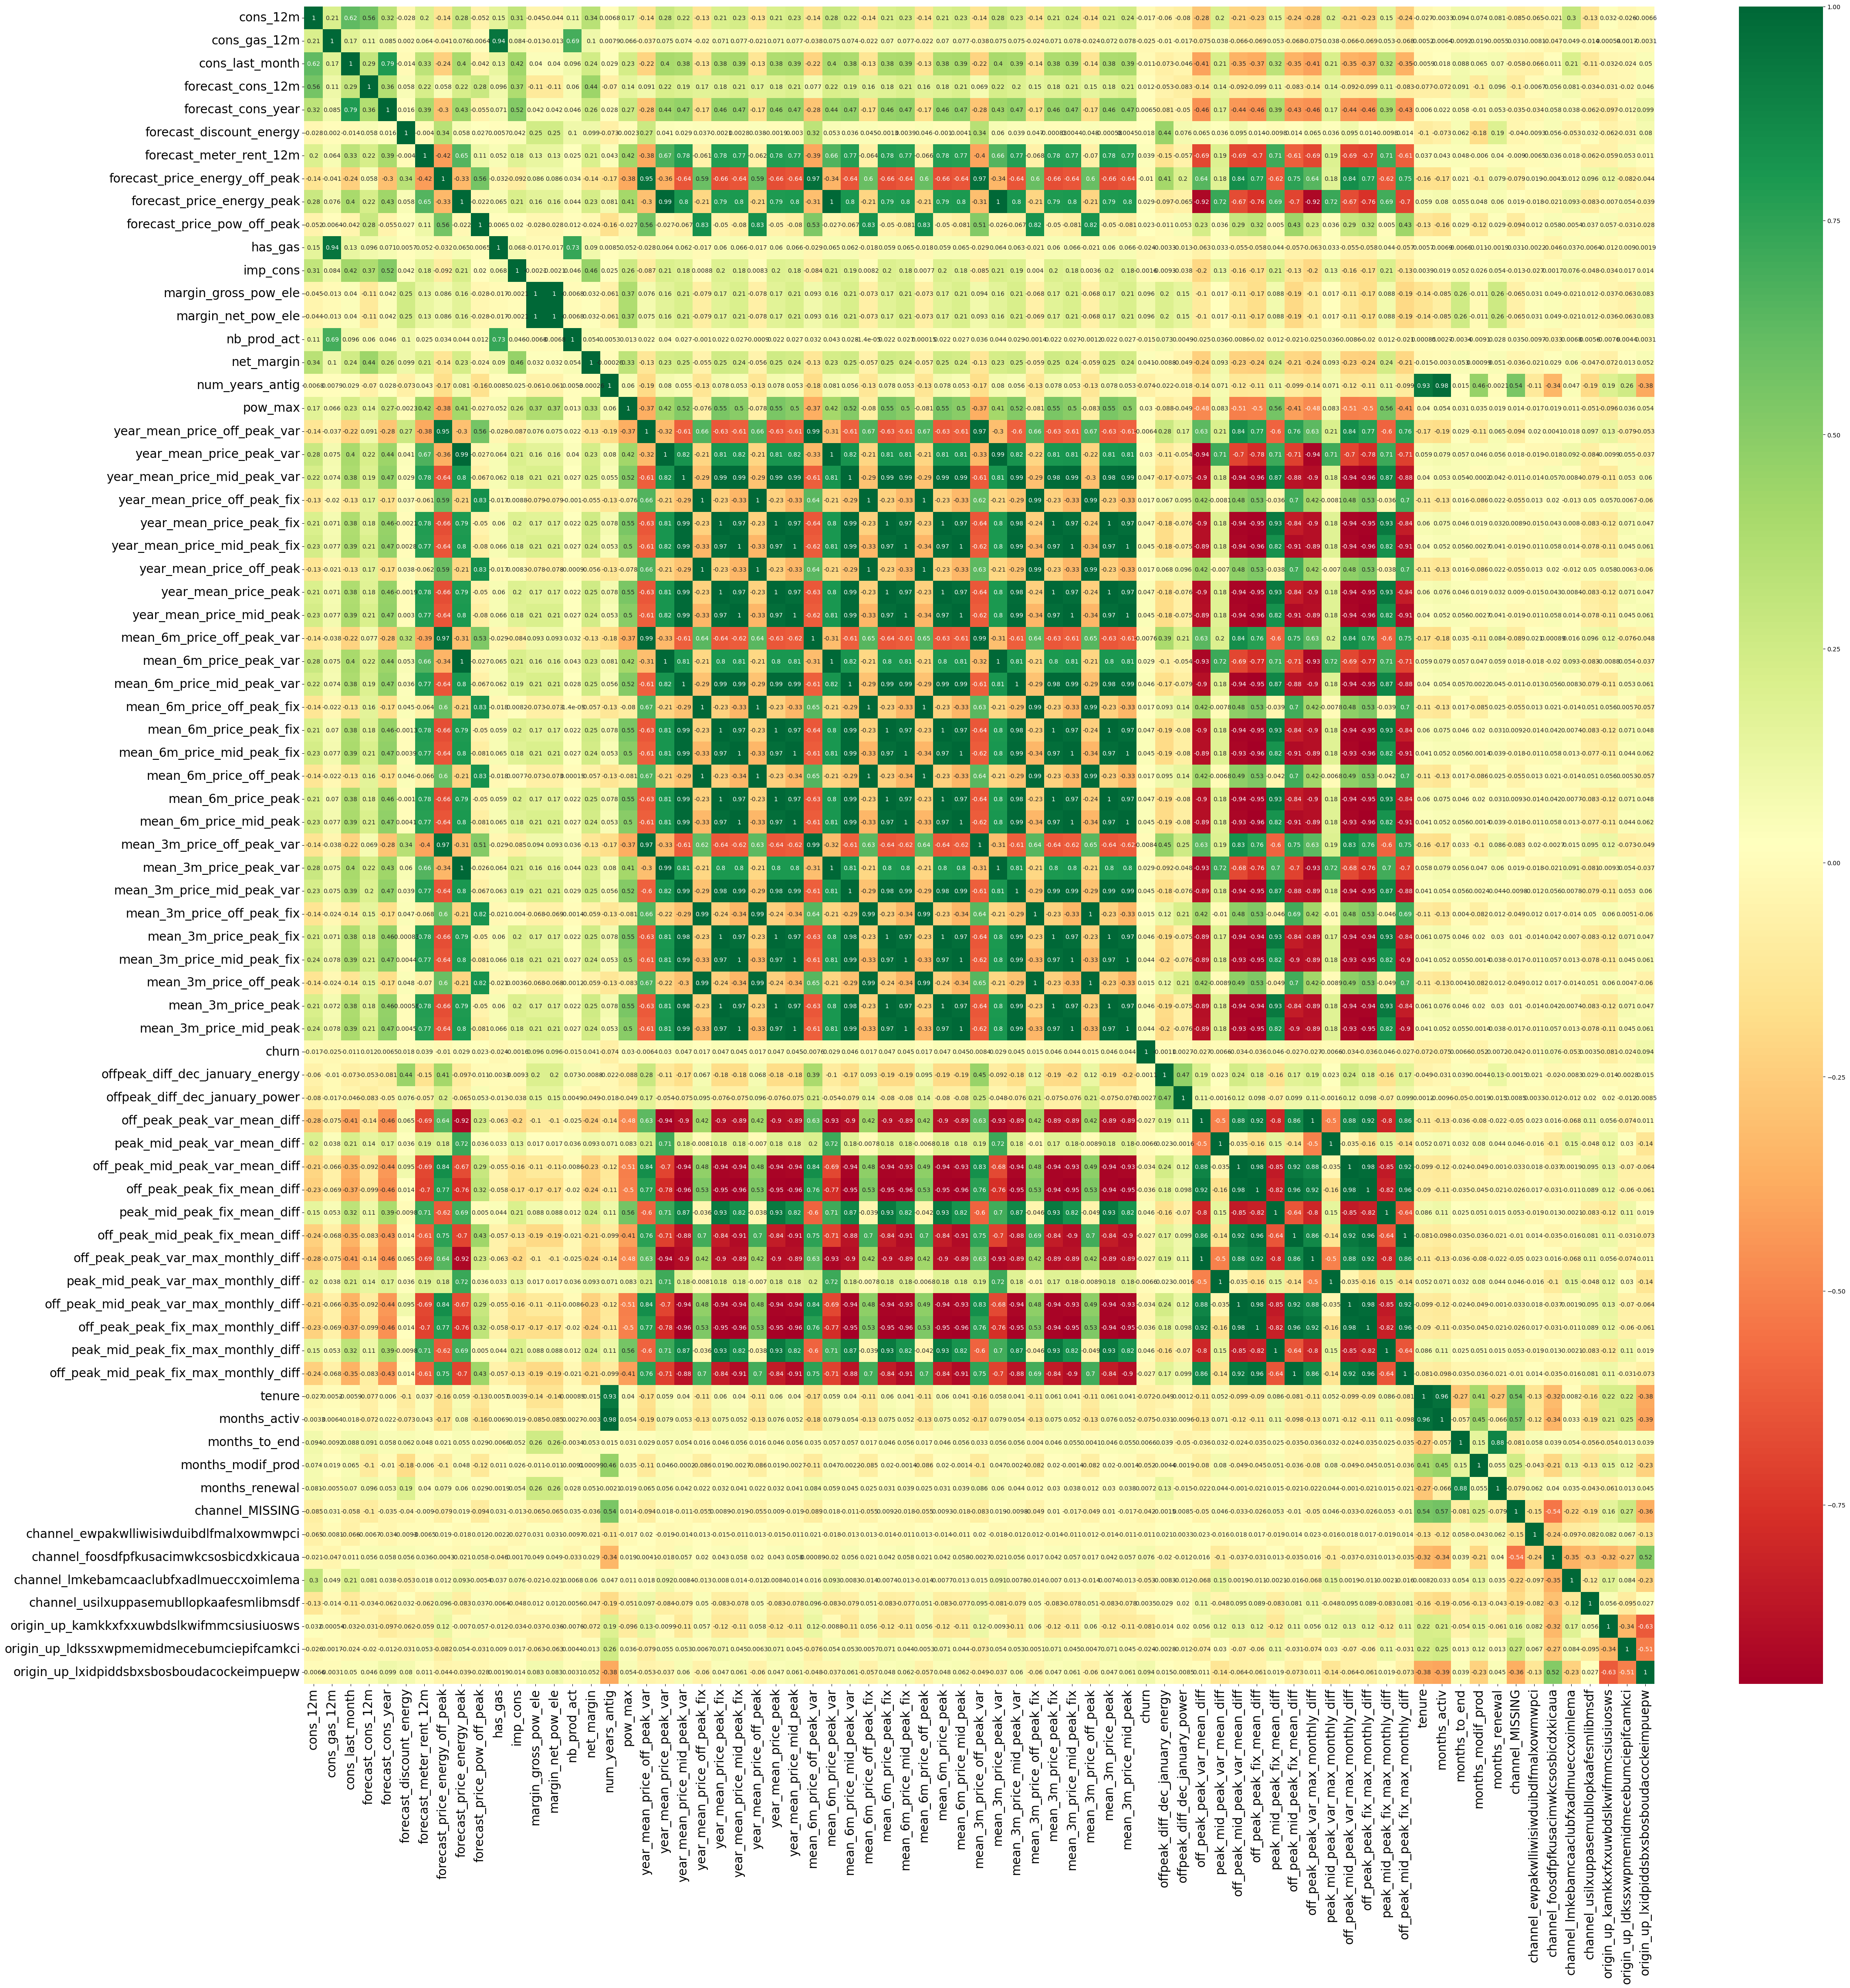

In [28]:
# plotting correlation matrix in heatmap
plt.figure(figsize=(50,50))
sns.heatmap(corr, annot=True, cmap='RdYlGn')

# changing size of xticks and yticks
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [29]:
# Removing two columns with high correlation
eda_data = eda_data.drop(columns=['num_years_antig', 'forecast_cons_year'])
eda_data.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944         0.000000   
1  d29c2c54acc38ff3c0614d0a653813dd  3.668479      0.000000         0.000000   
2  764c75f661154dac3a6c254cd082ea7d  2.736397      0.000000         0.000000   
3  bba03439a292a1e166f80264c16191cb  3.200029      0.000000         0.000000   
4  149d57cf92fc41cf94415803a877cb4b  3.646011      0.000000         2.721811   

   forecast_cons_12m  forecast_discount_energy  forecast_meter_rent_12m  \
0           0.000000                       0.0                 0.444045   
1           2.280920                       0.0                 1.237292   
2           1.689841                       0.0                 1.599009   
3           2.382089                       0.0                 1.318689   
4           2.650065                       0.0                 2.122969   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.047073                    0.040659   
1                        0.059075                    0.000000   
2                        0.066622                    0.036589   
3                        0.059448                    0.000000   
4                        0.048014                    0.041399   

   forecast_price_pow_off_peak  ...  months_modif_prod  months_renewal  \
0                     1.619163  ...                  2               6   
1                     1.656207  ...                 76               4   
2                     1.656207  ...                 68               8   
3                     1.656207  ...                 69               9   
4                     1.619163  ...                 71               9   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                0                                         0   
1                1                                         0   
2                0                                         0   
3                0                                         0   
4                1                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           0  
2                                           0  
3                                           0  
4                                           0  

[5 rows x 72 columns]

## Building Prediction Model with Random Forest

### Data Sampling

In [30]:
# Making a copy of our data set before divide them into test and train set
train_df = eda_data.copy()

# Separting dataset into X & Y
X = eda_data.drop(columns=['id','churn'])
y = eda_data['churn']

In [31]:
X.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0  0.000000      4.739944         0.000000           0.000000   
1  3.668479      0.000000         0.000000           2.280920   
2  2.736397      0.000000         0.000000           1.689841   
3  3.200029      0.000000         0.000000           2.382089   
4  3.646011      0.000000         2.721811           2.650065   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                 0.444045   
1                       0.0                 1.237292   
2                       0.0                 1.599009   
3                       0.0                 1.318689   
4                       0.0                 2.122969   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.047073                    0.040659   
1                        0.059075                    0.000000   
2                        0.066622                    0.036589   
3                        0.059448                    0.000000   
4                        0.048014                    0.041399   

   forecast_price_pow_off_peak  has_gas  ...  months_modif_prod  \
0                     1.619163        1  ...                  2   
1                     1.656207        0  ...                 76   
2                     1.656207        0  ...                 68   
3                     1.656207        0  ...                 69   
4                     1.619163        0  ...                 71   

   months_renewal  channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0               6                0                                         0   
1               4                1                                         0   
2               8                0                                         0   
3               9                0                                         0   
4               9                1                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           0  
2                                           0  
3                                           0  
4                                           0  

[5 rows x 70 columns]

In [32]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

### Dividing data into test and train split

In [33]:
# Dividing data into 75% train and 25% test

# importing required library
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75, test_size=0.25, random_state=42)

In [34]:
# Checking shape of the train test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10953, 70)
(3652, 70)
(10953,)
(3652,)


### Random Forest Classifier

In [35]:
# Importing required library
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=1000, criterion='entropy', random_state=0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

### Model Prediction on X_test data

In [36]:
y_pred = rf_classifier.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

### Model Evaulation

In [37]:
# Importing necessary libraries

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score, f1_score, roc_auc_score, roc_curve, classification_report

### Model Evaluation Score

#### Classification Report

In [38]:
print("*"*12 + ' Classification Report '+ "*"*12+"\n")
print(classification_report(y_test,y_pred))

************ Classification Report ************

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3279
           1       0.92      0.06      0.12       373

    accuracy                           0.90      3652
   macro avg       0.91      0.53      0.53      3652
weighted avg       0.91      0.90      0.86      3652



#### Confusion Matrix

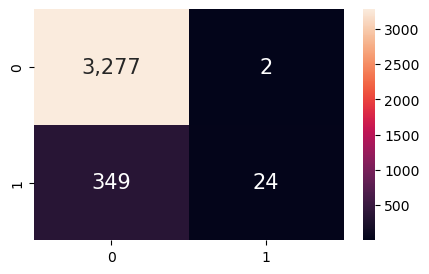

In [39]:
plt.figure(figsize=(5,3))
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix,annot= True, annot_kws={'size': 15},fmt=',d')

plt.show()

#### Accuracy Score

In [40]:
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy Score :- ', accuracy)

Accuracy Score :-  0.9038882803943045


#### Precision

In [41]:
precision = precision_score(y_test, y_pred)
print("Precision Score :- ", precision)

Precision Score :-  0.9230769230769231


#### Recall

In [42]:
recall = recall_score(y_test,y_pred)
print("Recall Score :- ", recall)

Recall Score :-  0.064343163538874


#### F1 - Score

In [43]:
f1 = f1_score(y_test, y_pred)
print('F1 - Score :- ', f1)

F1 - Score :-  0.12030075187969926


#### ROC_AUC Score

In [44]:
auc = roc_auc_score(y_test, y_pred)
print("AUC score:- ", auc)

AUC score:-  0.5318666107416847


#### ROC Curve

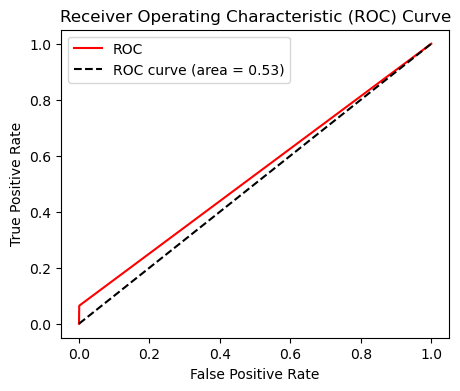

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='black', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


### K-Fold Cross Vaildation


In [46]:
# Applying 5-fold cross vaildation

## Importing required library
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv= 5, scoring= 'accuracy')
print('Cross Vaildation Score : {}'.format(cv_scores))

Cross Vaildation Score : [0.90597901 0.91328161 0.90917389 0.90730594 0.90730594]


In [47]:
# Cross Vaildation score mean
print('Mean Cross Vaildation Score :{}'.format(cv_scores.mean()))

Mean Cross Vaildation Score :0.9086092753876901


### Model Understanding

Examining feature_importances is a quick and easy way to comprehend a model's findings. There are several ways to calculate feature importance, however using the Random Forest classifier, we are able to extract feature_importances using the built-in approach on the trained model. feature_importances reflect the importance of a feature within the prediction model. The amount of times each feature is used for splitting across all trees in the Random Forest scenario is represented by the feature importance

In [48]:
feature_importance = pd.DataFrame({'features': X_train.columns, 'importance':rf_classifier.feature_importances_}).sort_values(
by='importance', ascending = False).reset_index()

In [49]:
feature_importance

index                    features  importance
0       0                    cons_12m    0.052674
1      12          margin_net_pow_ele    0.048090
2      11        margin_gross_pow_ele    0.047467
3       5     forecast_meter_rent_12m    0.047296
4      14                  net_margin    0.046617
..    ...                         ...         ...
65     30  mean_6m_price_mid_peak_fix    0.001638
66     29      mean_6m_price_peak_fix    0.001464
67     38      mean_3m_price_peak_fix    0.000757
68     39  mean_3m_price_mid_peak_fix    0.000750
69      4    forecast_discount_energy    0.000646

[70 rows x 3 columns]

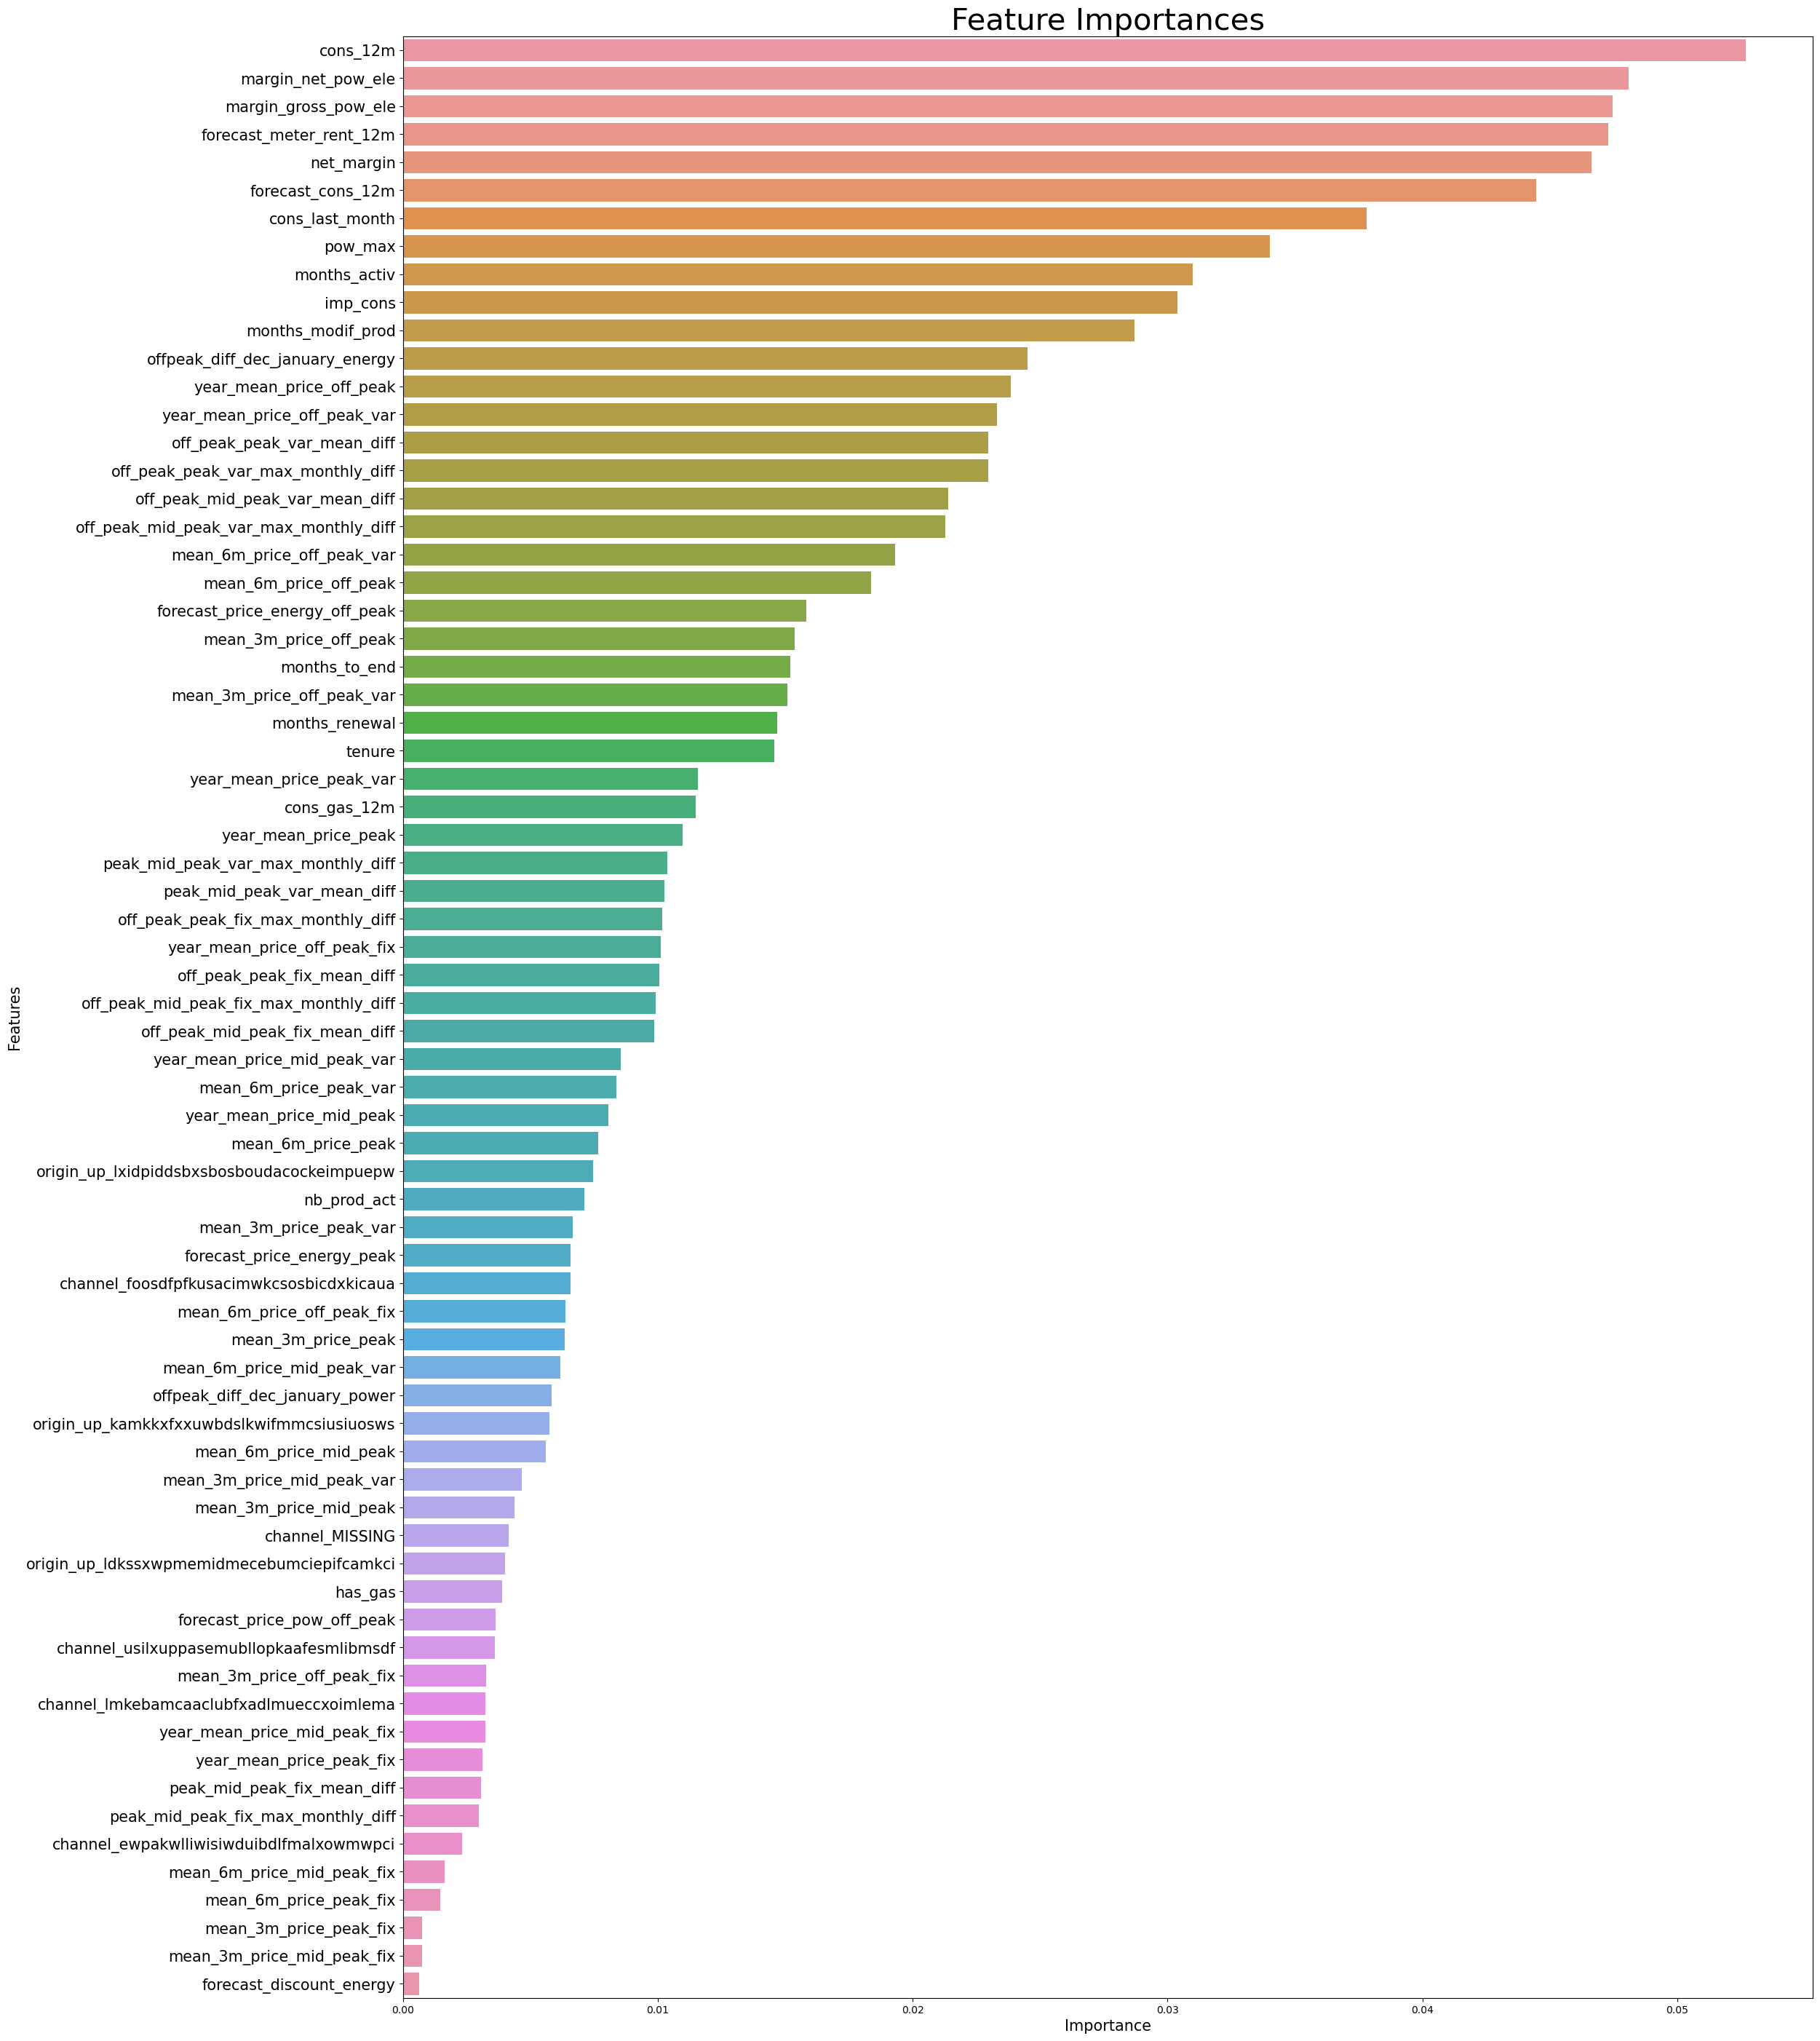

In [50]:
plt.figure(figsize=(25,35))
sns.barplot(data= feature_importance, x='importance', y=feature_importance['features'], orient='h')
plt.xlabel('Importance', size =15)
plt.ylabel('Features', size=15)
plt.yticks(size=15)
plt.title('Feature Importances', size=30)
plt.show()

From Above chart we can observe following points

    >> In this model, the net margin on electricity subscription and consumption over a 12-month period is a major driver of   churn.
    >> The forcasted metre rental fee over the following two months is also a significant motivator.
    >> Time appears to be a significant aspect, particularly the number of months they have been active, their tenure, and the number of months since their contract was modified.
    >> The feature that our colleague suggested is in the top half in terms of influence, and some of the features developed off of it actually outperform it.
    >> Our price sensitivity features are distributed throughout, but they are not the primary cause of customer turnover.
    

In [51]:
proba_predictions = rf_classifier.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [52]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

### Saving dataframe in csv file

In [53]:
X_test['churn'] = y_pred.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('predicted_data.csv')

## Business Impact of discount

### Data Loading

In [54]:
test_data = pd.read_csv('predicted_data.csv')
test_data.drop(test_data.columns[0], axis=1, inplace=True)
test_data.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0  5.705621      0.000000         4.715176           0.000000   
1  6.000648      5.203623         5.050759           2.818932   
2  0.000000      0.000000         0.000000           0.000000   
3  4.345433      0.000000         0.000000           3.516690   
4  3.201943      0.000000         2.484300           2.523109   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                 2.166341   
1                       0.0                 1.312177   
2                       0.0                 2.125774   
3                       0.0                 1.304921   
4                       0.0                 1.238548   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.049362                    0.042767   
1                        0.058768                    0.000000   
2                        0.038403                    0.035987   
3                        0.058045                    0.000000   
4                        0.057451                    0.000000   

   forecast_price_pow_off_peak  has_gas  ...  channel_MISSING  \
0                     1.619163        0  ...                0   
1                     1.656207        1  ...                0   
2                     1.779405        0  ...                1   
3                     1.656207        0  ...                0   
4                     1.656207        0  ...                0   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         0   
3                                         1   
4                                         1   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         1   
2                                         0   
3                                         0   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           1   
2                                           1   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  churn  churn_probability  
0                                           1      1              0.524  
1                                           0      0              0.164  
2                                           0      0              0.005  
3                                           1      0              0.129  
4                                           1      0              0.172  

[5 rows x 72 columns]

### Calculating Estimate

In [55]:
# Electricity revenue for each customer consists of energy consumption (amount * price) and the meter rent
# (the power price may also play a role, but we will ignore it for now since we need to ask the client for more data)
# Note that we need to reverse the log10-transformation from the data cleaning step 

test_data['basecase_revenue'] = (np.power(10, test_data['forecast_cons_12m']) + 1) * test_data['forecast_price_energy_off_peak'] + test_data['forecast_meter_rent_12m']

# Taking churn into account
test_data['basecase_revenue_after_churn'] = test_data['basecase_revenue'] * (1 - 0.919 * test_data['churn'])

In [56]:
test_data.head(10)

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0  5.705621      0.000000         4.715176           0.000000   
1  6.000648      5.203623         5.050759           2.818932   
2  0.000000      0.000000         0.000000           0.000000   
3  4.345433      0.000000         0.000000           3.516690   
4  3.201943      0.000000         2.484300           2.523109   
5  4.035630      0.000000         3.116608           3.059885   
6  5.962233      0.000000         4.822325           3.504777   
7  6.324612      0.000000         5.364528           2.801849   
8  6.758264      0.000000         5.887169           3.392095   
9  3.474799      0.000000         2.672098           2.653541   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                 2.166341   
1                       0.0                 1.312177   
2                       0.0                 2.125774   
3                       0.0                 1.304921   
4                       0.0                 1.238548   
5                       0.0                 1.171434   
6                       0.0                 1.444201   
7                       0.0                 1.610341   
8                       0.0                 2.161907   
9                       0.0                 1.308564   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.049362                    0.042767   
1                        0.058768                    0.000000   
2                        0.038403                    0.035987   
3                        0.058045                    0.000000   
4                        0.057451                    0.000000   
5                        0.058001                    0.000000   
6                        0.065975                    0.035895   
7                        0.047862                    0.041944   
8                        0.047343                    0.040933   
9                        0.059445                    0.000000   

   forecast_price_pow_off_peak  has_gas  ...  \
0                     1.619163        0  ...   
1                     1.656207        1  ...   
2                     1.779405        0  ...   
3                     1.656207        0  ...   
4                     1.656207        0  ...   
5                     1.665660        0  ...   
6                     1.656207        0  ...   
7                     1.622618        0  ...   
8                     1.619163        0  ...   
9                     1.656207        0  ...   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         0   
3                                         1   
4                                         1   
5                                         1   
6                                         0   
7                                         1   
8                                         0   
9                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         1   
2                                         0   
3                                         0   
4                                         0   
5                                         0   
6                                         0   
7                                         0   
8                                         1   
9                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   
5                                         0   
6                                         0   
7            

In [57]:
def get_rev_delta(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2) -> float:
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff
    """
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # Churn predicted => discount is given => customer stays for full year, independent of whether the prediction
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[pred['churn_probability'] >= cutoff, 'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()


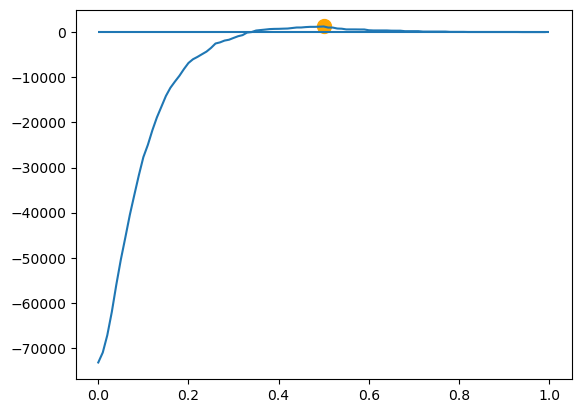

Maximum benefit at cutoff 0.5 with revenue delta of $1,251.04


In [58]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas = pd.Series({cutoff: get_rev_delta(test_data, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})

def plot_tradeoff(rev_deltas: pd.Series):
    # Plot the revenue deltas
    rev_deltas.plot()
    # Mark optimal point
    max_pred = rev_deltas.idxmax()
    plt.scatter(max_pred, rev_deltas.loc[max_pred], s=100, c='orange')
    # Reference line for break-even
    plt.hlines(0, 0, 1)
    plt.show()
    print(f'Maximum benefit at cutoff {max_pred} with revenue delta of ${rev_deltas.loc[max_pred]:,.2f}')

plot_tradeoff(rev_deltas)

                                                     •♦•♦•♦•